| <h1> Final Exam | <h1>Model Deployment in the Cloud </h1> |
|--- | --- |
**Name:** Jomarie Dupaya, John Loyd Santiago
**Course and Section:** CPE019, CPE32S3 <br>
**Instructor:** Engr. Roman Richard
**Date Submitted:** 5/18/24

<hr>

**Title**: Detroit Daily Temperatures with Artificial Warming

**Dataset link**: https://www.kaggle.com/datasets/agajorte/detroit-daily-temperatures-with-artificial-warming

**Content**

The given data set was produced from the Historical Hourly Weather Data [https://www.kaggle.com/selfishgene/historical-hourly-weather-data], which consists of about 5 years of hourly measurements of various weather attributes (eg. temperature, humidity, air pressure) from 30 US and Canadian cities.

From this rich database, a cutout was made by selecting only the city of Detroit (USA), highlighting only the temperature, converting it to Celsius degrees and keeping only one value for each date (corresponding to the average daytime temperature - from 9am to 5pm).

In addition, temperature values ​​were artificially and gradually increased by a few Celsius degrees over the available period. This will simulate a small global warming (or is it local?)…

In summary, the available dataset contains the average daily temperatures (collected during the day), artificially increased by a certain value, for the city of Detroit from October 2012 to November 2017.

The purpose of this dataset is to apply forecasting models in order to predict the value of the artificially warmed average daily temperature of Detroit.

See graph in the following image: black dots refer to the actual data and the blue line represents the predictive model (including a confidence area).

#Data Cleaning, Preprocessing and Exploratory Data Analysis

Data Information:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1886 entries, 2012-10-01 to 2017-11-29
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   temperature  1885 non-null   float64
dtypes: float64(1)
memory usage: 29.5 KB
None

First Five Rows of the Dataset:
            temperature
date                   
2012-10-01    11.036840
2012-10-02    14.340558
2012-10-03    14.518382
2012-10-04    16.820351
2012-10-05    16.948431

Statistical Summary:
       temperature
count  1885.000000
mean     13.782933
std      11.418935
min     -20.568680
25%       5.289972
50%      14.602483
75%      23.146501
max      35.738109

Checking for Missing Values:
temperature    1
dtype: int64

Checking for Missing Values After Removal:
temperature    0
dtype: int64


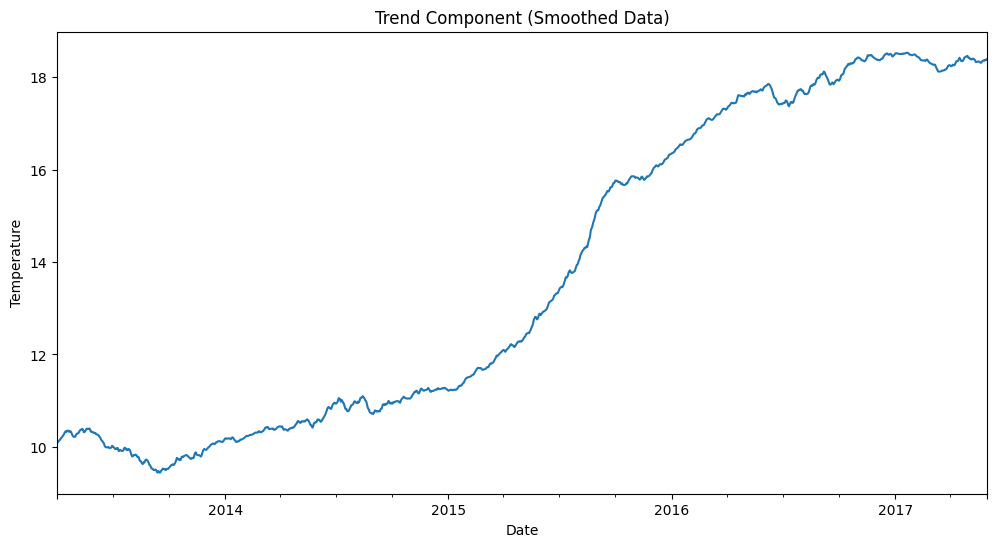

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error
from numpy import sqrt
import warnings

# Suppress warnings from statsmodels
warnings.filterwarnings("ignore")

# Function to parse date
def parser(x):
    return datetime.strptime(x, '%Y-%m-%d')

# Load the dataset
file_path = '/content/weather-complete.csv'
series = pd.read_csv(file_path, header=0, parse_dates=[0], index_col=0, date_parser=parser)

# Exploratory Data Analysis
print("Data Information:")
print(series.info())
print("\nFirst Five Rows of the Dataset:")
print(series.head())
print("\nStatistical Summary:")
print(series.describe())

# Check for missing values
print("\nChecking for Missing Values:")
print(series.isnull().sum())

# Remove missing values
series.dropna(inplace=True)

# Confirm missing values are removed
print("\nChecking for Missing Values After Removal:")
print(series.isnull().sum())

# Ensure the data has a daily frequency
series = series.asfreq('D')

# Decompose the time series using additive model
result = seasonal_decompose(series.interpolate(method='linear'), model='additive', period=365)
series_trend = result.trend.dropna()

# Plot the smoothed data (trend component)
plt.figure(figsize=(12, 6))
series_trend.plot()
plt.title("Trend Component (Smoothed Data)")
plt.xlabel("Date")
plt.ylabel("Temperature")
plt.show()

# Use trend component for ARIMA model
smoothed_series = series_trend

# Split data into training and test sets
train_data = smoothed_series[:'2016-12-31']
test_data = smoothed_series['2017-01-01':]

In [ ]:
# Function to evaluate ARIMA model
def evaluate_arima_model(train, test, arima_order):
    model = ARIMA(train, order=arima_order)
    results = model.fit()
    start = len(train)
    end = start + len(test) - 1
    predictions = results.predict(start=start, end=end, dynamic=False)
    mse = mean_squared_error(test, predictions)
    return mse, predictions

# Function to evaluate multiple ARIMA models
def evaluate_models(train, test, p_values, d_values, q_values):
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p, d, q)
                try:
                    mse, _ = evaluate_arima_model(train, test, order)
                    if mse < best_score:
                        best_score, best_cfg = mse, order
                    print('ARIMA%s MSE=%.3f' % (order, mse))
                except:
                    continue
    print('Best ARIMA=%s MSE=%.3f' % (best_cfg, best_score))
    return best_cfg

# Parameter ranges for ARIMA model
p_values = range(0, 10)
d_values = range(0, 3)
q_values = range(0, 3)
warnings.filterwarnings("ignore")
best_cfg = evaluate_models(train_data, test_data, p_values, d_values, q_values)

ARIMA(0, 0, 0) MSE=26.640
ARIMA(0, 0, 1) MSE=26.488
ARIMA(0, 0, 2) MSE=26.353
ARIMA(0, 1, 0) MSE=0.030
ARIMA(0, 1, 1) MSE=0.032
ARIMA(0, 1, 2) MSE=0.033
ARIMA(0, 2, 0) MSE=1.719
ARIMA(0, 2, 1) MSE=1.552
ARIMA(0, 2, 2) MSE=0.166
ARIMA(1, 0, 0) MSE=0.029
ARIMA(1, 0, 1) MSE=0.030
ARIMA(1, 0, 2) MSE=0.044
ARIMA(1, 1, 0) MSE=0.038
ARIMA(1, 1, 1) MSE=0.036
ARIMA(1, 1, 2) MSE=0.042
ARIMA(1, 2, 0) MSE=1.674
ARIMA(1, 2, 1) MSE=0.282
ARIMA(1, 2, 2) MSE=0.235
ARIMA(2, 0, 0) MSE=0.218
ARIMA(2, 0, 1) MSE=0.030
ARIMA(2, 0, 2) MSE=0.032
ARIMA(2, 1, 0) MSE=0.036
ARIMA(2, 1, 1) MSE=0.037
ARIMA(2, 1, 2) MSE=0.043
ARIMA(2, 2, 0) MSE=1.889
ARIMA(2, 2, 1) MSE=0.228
ARIMA(2, 2, 2) MSE=0.226
ARIMA(3, 0, 0) MSE=0.043
ARIMA(3, 0, 1) MSE=0.032
ARIMA(3, 0, 2) MSE=0.011
ARIMA(3, 1, 0) MSE=0.041
ARIMA(3, 1, 1) MSE=0.058
ARIMA(3, 1, 2) MSE=0.043
ARIMA(3, 2, 0) MSE=1.495
ARIMA(3, 2, 1) MSE=0.274
ARIMA(3, 2, 2) MSE=0.229
ARIMA(4, 0, 0) MSE=0.017
ARIMA(4, 0, 1) MSE=0.034
ARIMA(4, 0, 2) MSE=0.028
ARIMA(4, 1, 0) MSE=0.0

In [ ]:
# Fit ARIMA model with the best configuration
model = ARIMA(train_data, order=best_cfg)
results = model.fit()

# Generate predictions
predictions = results.predict(start=len(train_data), end=len(smoothed_series)-1, dynamic=False)

last_date_index = smoothed_series.index[-1]

# Generate forecast for the next 20 days beyond the dataset timeline
forecast_period = 60
forecast_start_date = last_date_index + pd.Timedelta(days=1)  # Start forecasting from the day after the last date in the index
forecast_index = pd.date_range(start=forecast_start_date, periods=forecast_period, freq='D')
forecast = results.forecast(steps=forecast_period)
forecast.index = forecast_index

# Print the forecast
print("Forecast (steps = 60):")
print(forecast)

# Calculate MSE and RMSE
mse = mean_squared_error(test_data, predictions[:len(test_data)])
rmse = sqrt(mse)
print("MSE: ", mse)
print("RMSE: ", rmse)

print(results.summary())

Forecast (steps = 60):
2017-06-01    18.491203
2017-06-02    18.487299
2017-06-03    18.471813
2017-06-04    18.465702
2017-06-05    18.456530
2017-06-06    18.460952
2017-06-07    18.461359
2017-06-08    18.470572
2017-06-09    18.469934
2017-06-10    18.473800
2017-06-11    18.466599
2017-06-12    18.465626
2017-06-13    18.457023
2017-06-14    18.457979
2017-06-15    18.453217
2017-06-16    18.457931
2017-06-17    18.455321
2017-06-18    18.459968
2017-06-19    18.455553
2017-06-20    18.457718
2017-06-21    18.451336
2017-06-22    18.452743
2017-06-23    18.446922
2017-06-24    18.449693
2017-06-25    18.445344
2017-06-26    18.449034
2017-06-27    18.444802
2017-06-28    18.447886
2017-06-29    18.442743
2017-06-30    18.445024
2017-07-01    18.439526
2017-07-02    18.441936
2017-07-03    18.436930
2017-07-04    18.439893
2017-07-05    18.435287
2017-07-06    18.438332
2017-07-07    18.433545
2017-07-08    18.436246
2017-07-09    18.431152
2017-07-10    18.433679
2017-07-11    18.

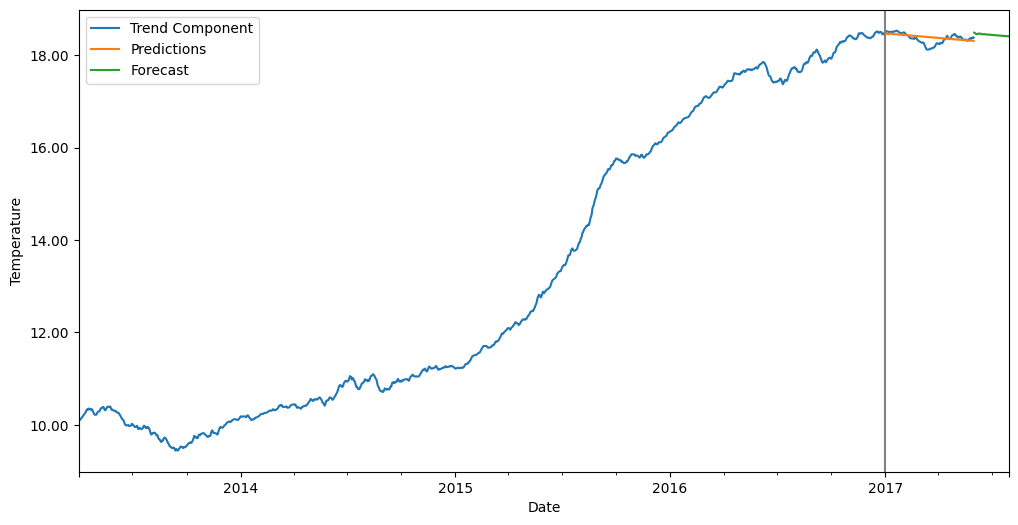

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Define xlabel and ylabel
xlabel = 'Date'
ylabel = 'Temperature'

# Define the formatter
formatter = ticker.FuncFormatter(lambda x, _: f'{x:.2f}')

# Plotting
ax = smoothed_series.plot(legend=True, figsize=(12, 6), label='Trend Component')
predictions.index = test_data.index  # Align predictions with test data index
predictions.plot(legend=True, label='Predictions', ax=ax)
forecast.plot(legend=True, label='Forecast')

ax.axvline(x=test_data.index[0], color='gray')

ax.autoscale(axis='x', tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
ax.yaxis.set_major_formatter(formatter)
plt.legend()
plt.show()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


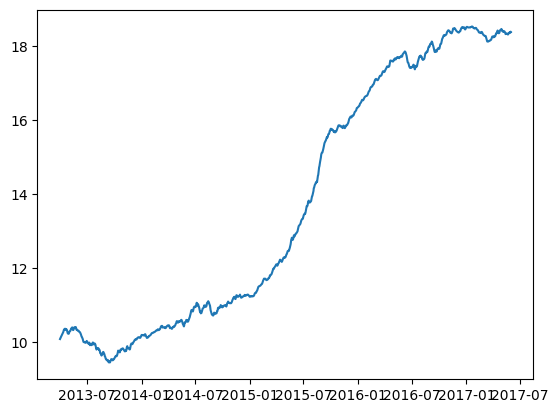

In [29]:
import pickle
import matplotlib.pyplot as plt
from google.colab import drive

drive.mount('/content/drive')

plt.plot(smoothed_series)

plot_data = {'figure': plt.gcf(), 'axes': plt.gca()}
plot_filename = '/content/drive/MyDrive/emtech/arima_model.pkl'
with open(plot_filename, 'wb') as f:
    pickle.dump(plot_data, f)

plt.show()